In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [5]:
start = '2012-01-01'
end = '2024-12-01'
stock = 'MSFT'

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [6]:
data.reset_index(inplace=True)

In [8]:
data

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,MSFT,MSFT,MSFT,MSFT,MSFT,MSFT
0,2012-01-03,21.120096,26.770000,26.959999,26.389999,26.549999,64731500
1,2012-01-04,21.617134,27.400000,27.469999,26.780001,26.820000,80516100
2,2012-01-05,21.838036,27.680000,27.730000,27.290001,27.379999,56081400
3,2012-01-06,22.177282,28.110001,28.190001,27.530001,27.530001,99455500
4,2012-01-09,21.885372,27.740000,28.100000,27.719999,28.049999,59706800
...,...,...,...,...,...,...,...
3244,2024-11-22,417.000000,417.000000,417.399994,411.059998,411.369995,24814600
3245,2024-11-25,418.790009,418.790009,421.079987,414.850006,418.380005,27691100
3246,2024-11-26,427.989990,427.989990,429.040009,418.850006,419.589996,23458900


In [9]:
ma_100_days = data.Close.rolling(100).mean()

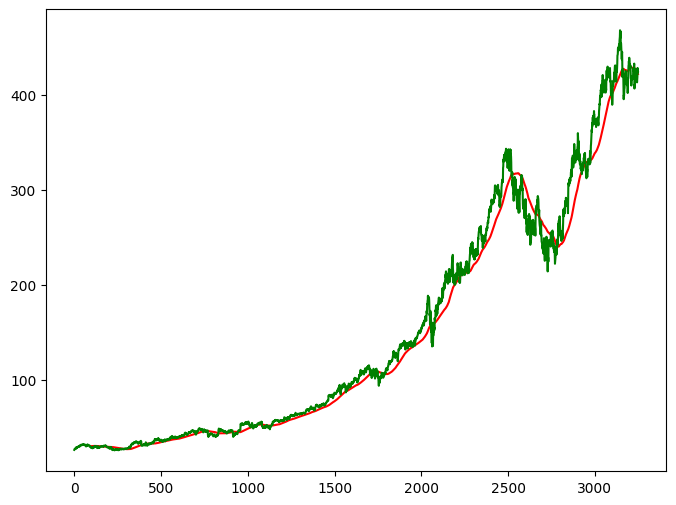

In [10]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [11]:
ma_200_days = data.Close.rolling(200).mean()

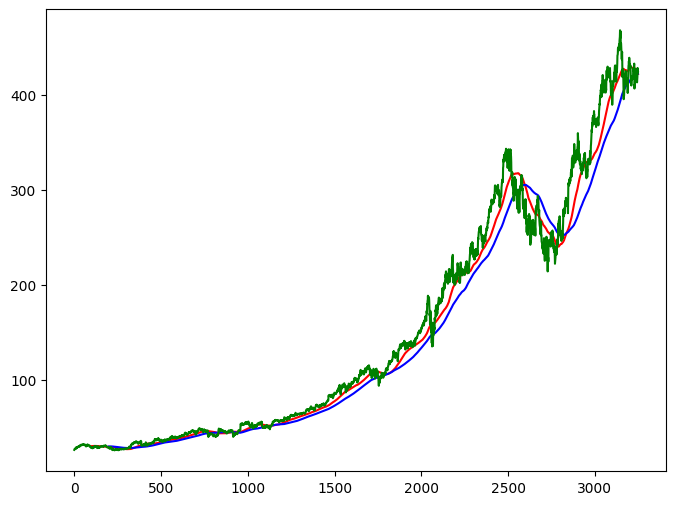

In [12]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [13]:
data.dropna(inplace=True)

In [14]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [15]:
data_train.shape[0]

2599

In [16]:
data_test.shape[0]

650

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [18]:
data_train_scale = scaler.fit_transform(data_train)

In [19]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [20]:
x, y = np.array(x), np.array(y)

In [21]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [22]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

c:\Users\iammu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [24]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 12s 105ms/step - loss: 0.0484
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 136ms/step - loss: 0.0043
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 140ms/step - loss: 0.0048
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 139ms/step - loss: 0.0045
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 12s 146ms/step - loss: 0.0040
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 142ms/step - loss: 0.0033
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 12s 158ms/step - loss: 0.0036
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 118ms/step - loss: 0.0031
Epoch 9/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 116ms/step - loss: 0.0047
Epoch 10/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 134ms/step - loss: 0.0027
Epoch 11/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 12s 157ms/step - loss: 0.0030
Epoch 12/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 12s 157ms/step - loss: 0.0030
Epoch 13/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 12s 151ms/step - loss: 0.0024
Epoch 14/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 12s 158ms/step - loss: 0.0032
Epoch 15/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 12s 14

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [26]:
pas_100_days = data_train.tail(100)

In [27]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [28]:
data_test_scale  =  scaler.fit_transform(data_test)

In [29]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [30]:
y_predict = model.predict(x)

21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step


In [31]:
scale =1/scaler.scale_

In [32]:
y_predict = y_predict*scale

In [33]:
y = y*scale

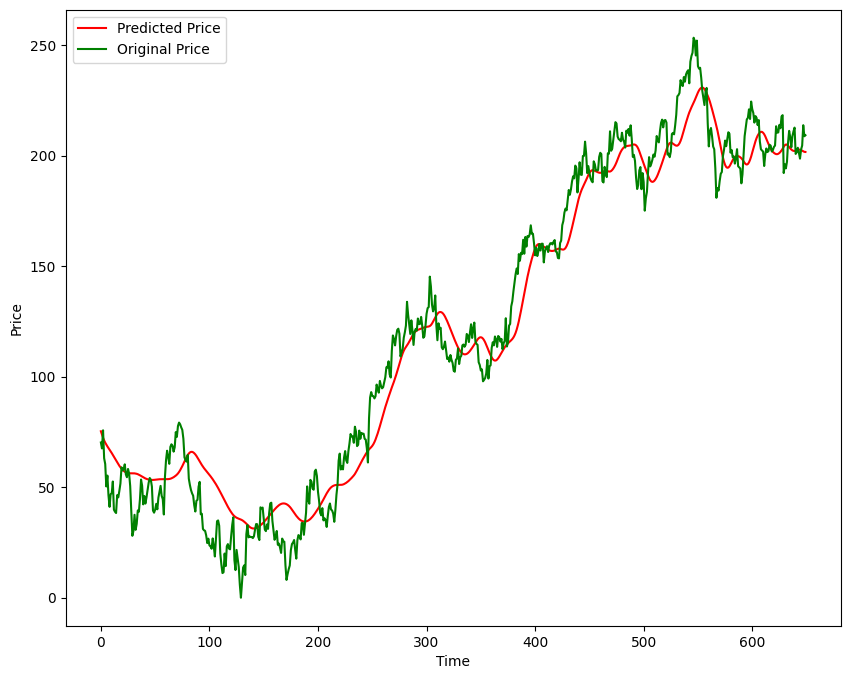

In [34]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [35]:
model.save('Stock Predictions Model.keras')